In [1]:
#from IPython.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer,StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score, classification_report,roc_auc_score,roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import time

In [3]:
# currect path of the dataset
current_directory = os.path.dirname(os.path.abspath("OVC_Project/"))
child_reg_path = os.path.join(current_directory, "Chid_Register.csv")
HH_reg_path = os.path.join(current_directory, "Household_Register.csv")
# Read the CSV file using pandas
child_reg = pd.read_csv(child_reg_path)
HH_reg = pd.read_csv(HH_reg_path)

In [4]:
child_reg.head()

,S/No,State,LGA,Ward,CBO,Date of enrollment (yyyy-mm-dd),HH Unique Id,OVC Id,Enrollment setting,Address,...,Current Viral load Result,Current Viral load Status,Name of school,Form/Grade,relationship to child,Child has case plan?,Date case plan developed,Last modified,Recorded by,CLASS
0,1,Plateau,Langtang North,Mabudi,AIDS CARE EDUCATION AND TRAINING SOCIETY,30/03/2022,PLA/LNN/ACE/00149,PLA/LNN/ACE/00149/00014,Community,ANGWAN UBANDOMA CLOSE TO PONZHI LOHKANA HOUSE ...,...,NaN,NaN,NaN,Primary 2,Grandparents,No,Mon Jan 01 00:00:00 WAT 1900,03/04/2022,acetnigeria2007,0
1,2,Plateau,Shendam,Yelwa,AIDS CARE EDUCATION AND TRAINING SOCIETY,12/12/2022,PLA/SHE/ACE/00967,PLA/SHE/ACE/00967/00002,Community,ANGWAN CONGO YELWA INSIDE YATE YIRKUK HOUSE,...,NaN,NaN,NaN,Primary 2,Mother,No,Mon Jan 01 00:00:00 WAT 1900,29/12/2022,acetnigeria2007,1
2,3,Plateau,Mangu,Mangu l,CENTER FOR CHILDREN IN CRISES,28/03/2022,PLA/MAN/CEN/00167,PLA/MAN/CEN/00167/00003,Community,OPPOSITE COCIN CHURCH MARISH,...,NaN,NaN,NaN,NaN,Mother,No,Mon Jan 01 00:00:00 WAT 1900,30/03/2022,CENCHIC,0
3,4,Plateau,Jos South,Chugwi,HEAL THE YOUTH FOUNDATION,24/05/2022,PLA/JSS/HTY/00319,PLA/JSS/HTY/00319/00004,Community,AFTER LEA CHUGWI,...,NaN,NaN,NaN,NaN,Mother,No,Mon Jan 01 00:00:00 WAT 1900,01/06/2022,htyf,0
4,5,Plateau,Mangu,Panyam,CENTER FOR CHILDREN IN CRISES,09/01/2022,PLA/MAN/CEN/00074,PLA/MAN/CEN/00074/00001,Facility,MARBEL BEHING COCIN CHURCH BOKKOS,...,39.0,Suppressed,NaN,NaN,Mother,No,Mon Jan 01 00:00:00 WAT 1900,10/02/2023,CENCHIC,1


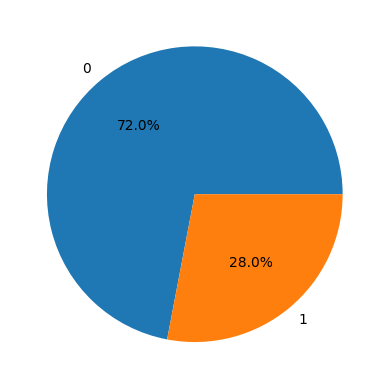

In [5]:
plt.pie(child_reg.CLASS.value_counts(), labels=child_reg.CLASS.value_counts().index, autopct='%1.1f%%')
plt.show()

In [6]:
child_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11296 entries, 0 to 11295
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   S/No                                      11296 non-null  int64  
 1   State                                     11296 non-null  object 
 2   LGA                                       11296 non-null  object 
 3   Ward                                      11296 non-null  object 
 4   CBO                                       11296 non-null  object 
 5   Date of enrollment (yyyy-mm-dd)           11296 non-null  object 
 6   HH Unique Id                              11296 non-null  object 
 7   OVC Id                                    11296 non-null  object 
 8   Enrollment setting                        11296 non-null  object 
 9   Address                                   11296 non-null  object 
 10  Current age                       

# Exploratory Data Analysis / Preprocessing

## Data Pruning

In [7]:
# Drop columns not useful to the data analysis
child_reg = child_reg.drop(['S/No','State','Name of school','Facility enrolled','Last modified', 'Recorded by','Facility ID','Address','HH Unique Id','Ward','OVC Id', 'Other enrollment stream','Form/Grade'], axis=1)


In [8]:
child_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11296 entries, 0 to 11295
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   LGA                                       11296 non-null  object 
 1   CBO                                       11296 non-null  object 
 2   Date of enrollment (yyyy-mm-dd)           11296 non-null  object 
 3   Enrollment setting                        11296 non-null  object 
 4   Current age                               11296 non-null  object 
 5   Sex(M/F)                                  11296 non-null  object 
 6   Date of Current HIV status                11296 non-null  object 
 7   Current enrollment status                 11296 non-null  object 
 8   Date of current status                    11296 non-null  object 
 9   Main enrollment stream                    11296 non-null  object 
 10  Baseline Safety                   

In [9]:
child_reg.isna().sum()

LGA                                             0
CBO                                             0
Date of enrollment (yyyy-mm-dd)                 0
Enrollment setting                              0
Current age                                     0
Sex(M/F)                                        0
Date of Current HIV status                      0
Current enrollment status                       0
Date of current status                          0
Main enrollment stream                          0
Baseline Safety                                 8
Current Safety                                  0
Baseline HIV status                             0
Current HIV status                              0
Child has birth certificate at baseline?        0
Child has birth certificate currently           0
Baseline in school                              0
Currently in School                             0
Nutrition                                       0
Current Nutrition                               0


## Treat Missing Value

In [10]:
child_reg['Enrolled on treatment?'].fillna(value='No', inplace=True)


if (child_reg['Enrolled on treatment?'] == 'No').all():
    child_reg['Treatment ID'].fillna(value='No', inplace=True)
else:
    child_reg['Treatment ID'].fillna(value='Not enrolled', inplace=True)



In [11]:
child_reg['Baseline ART STATUS '].fillna(value='Not ART', inplace=True)    
child_reg['Current ART STATUS'].fillna(value='Not ART', inplace=True)
child_reg['Baseline Viral load Result'].fillna(value=0, inplace=True)    
child_reg['Current Viral load Result'].fillna(value=0, inplace=True)
child_reg['Baseline Viral load Status'].fillna(value='no vl', inplace=True)    
child_reg['Current Viral load Status'].fillna(value='no vl', inplace=True)
#child_reg['Child in school'].fillna(value='No', inplace=True)    
#child_reg['Volunteer/Service provider'].fillna(child_reg['Volunteer/Service provider'].mode, inplace=True) 



In [12]:
child_reg.isna().sum()

LGA                                         0
CBO                                         0
Date of enrollment (yyyy-mm-dd)             0
Enrollment setting                          0
Current age                                 0
Sex(M/F)                                    0
Date of Current HIV status                  0
Current enrollment status                   0
Date of current status                      0
Main enrollment stream                      0
Baseline Safety                             8
Current Safety                              0
Baseline HIV status                         0
Current HIV status                          0
Child has birth certificate at baseline?    0
Child has birth certificate currently       0
Baseline in school                          0
Currently in School                         0
Nutrition                                   0
Current Nutrition                           0
Baseline Weight                             0
Baseline Height                   

## Check for Duplicate

In [13]:
child_reg.duplicated().sum()

244

## Drop Duplicate

In [14]:
duplicated = child_reg.duplicated(keep='first') # check duplicates and keep first sample
child_reg = child_reg[~duplicated]
child_reg.shape

(11052, 36)

## univarate Analysis

### Numerical

In [15]:
child_reg.describe()

,Baseline Weight,Baseline Height,Current Weight,Current Height,Baseline Viral load Result,Current Viral load Result,CLASS
count,11052.0,11052.0,11052.000000,11052.000000,1.105200e+04,1.105200e+04,11052.000000
mean,0.0,0.0,11.184105,45.260475,1.337199e+03,1.577779e+03,0.285921
std,0.0,0.0,17.133216,64.110957,3.595654e+04,3.686926e+04,0.451872
min,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
50%,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
75%,0.0,0.0,21.000000,114.000000,0.000000e+00,0.000000e+00,1.000000
max,0.0,0.0,190.000000,1105.000000,2.820000e+06,1.910000e+06,1.000000


/var/folders/5j/z39m2fvn0358b_xdsmf8qqqh0000gn/T/ipykernel_23789/1970326512.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=child_reg,x='CLASS',shade=True)


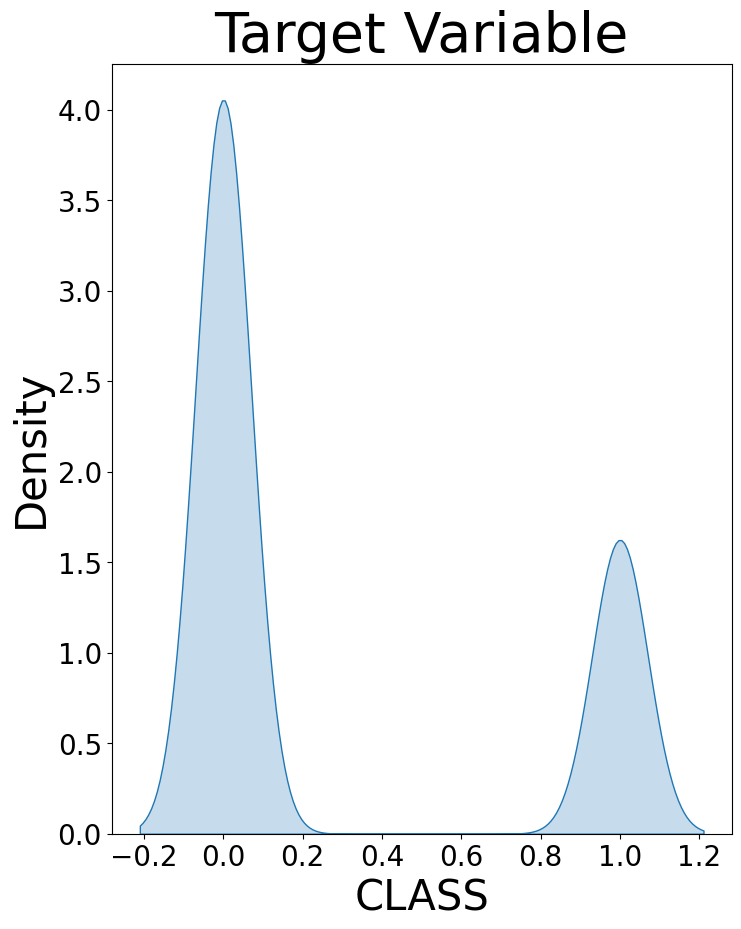

In [16]:
plt.figure(figsize=(8,10))
sns.kdeplot(data=child_reg,x='CLASS',shade=True)
plt.xlabel('CLASS',fontsize=30)
plt.ylabel('Density',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Target Variable", fontsize=40)
plt.show()

### Categorical

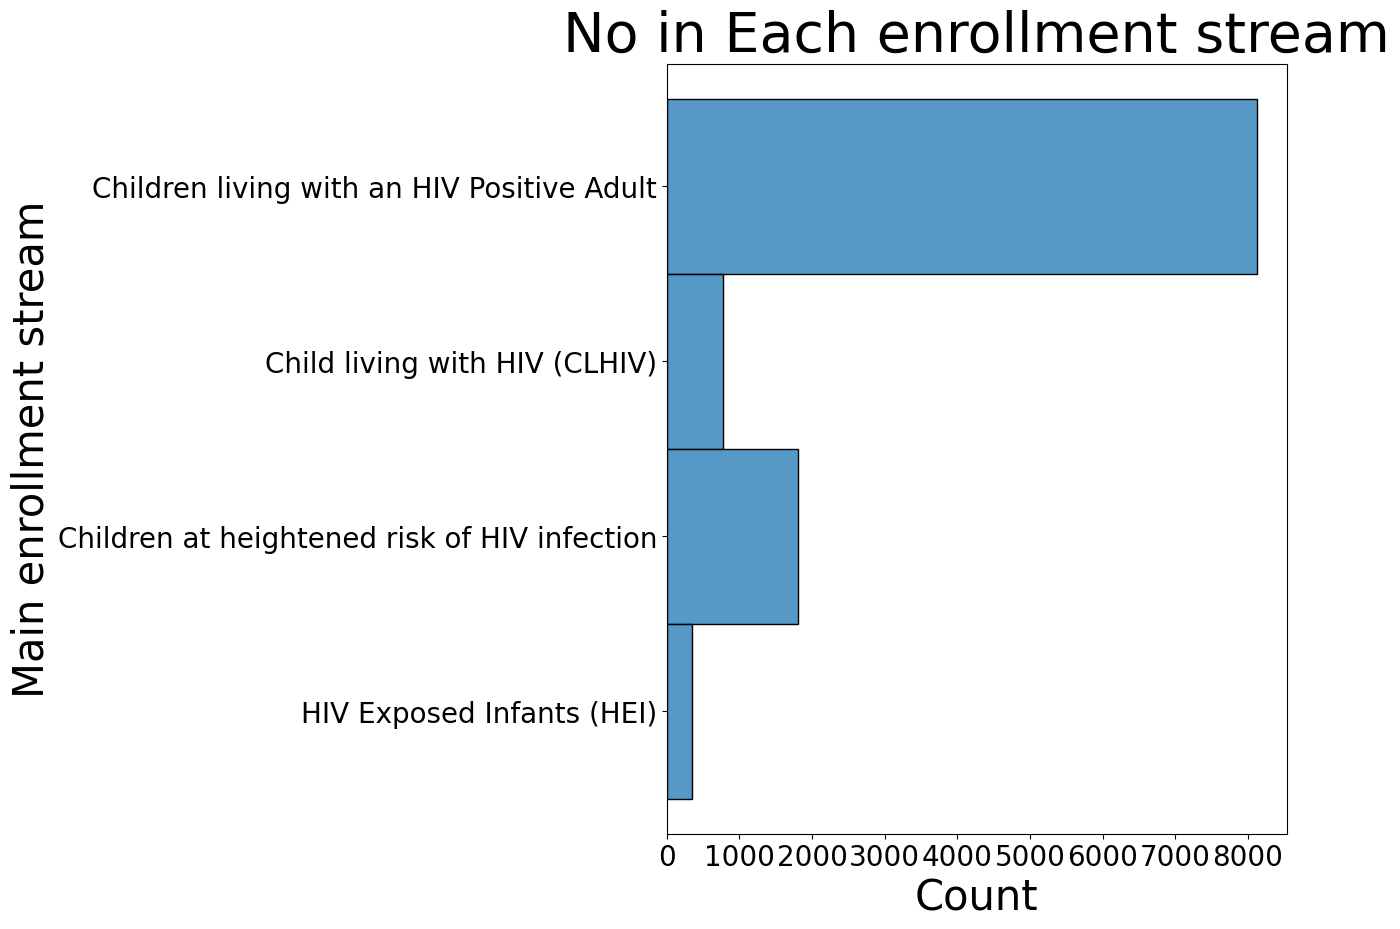

In [17]:
plt.figure(figsize=(8,10))
sns.histplot(data= child_reg, y='Main enrollment stream')
plt.xlabel('Count',fontsize=30)
plt.ylabel('Main enrollment stream',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("No in Each enrollment stream", fontsize=40)
plt.savefig(current_directory + '/Enrollment_stream')

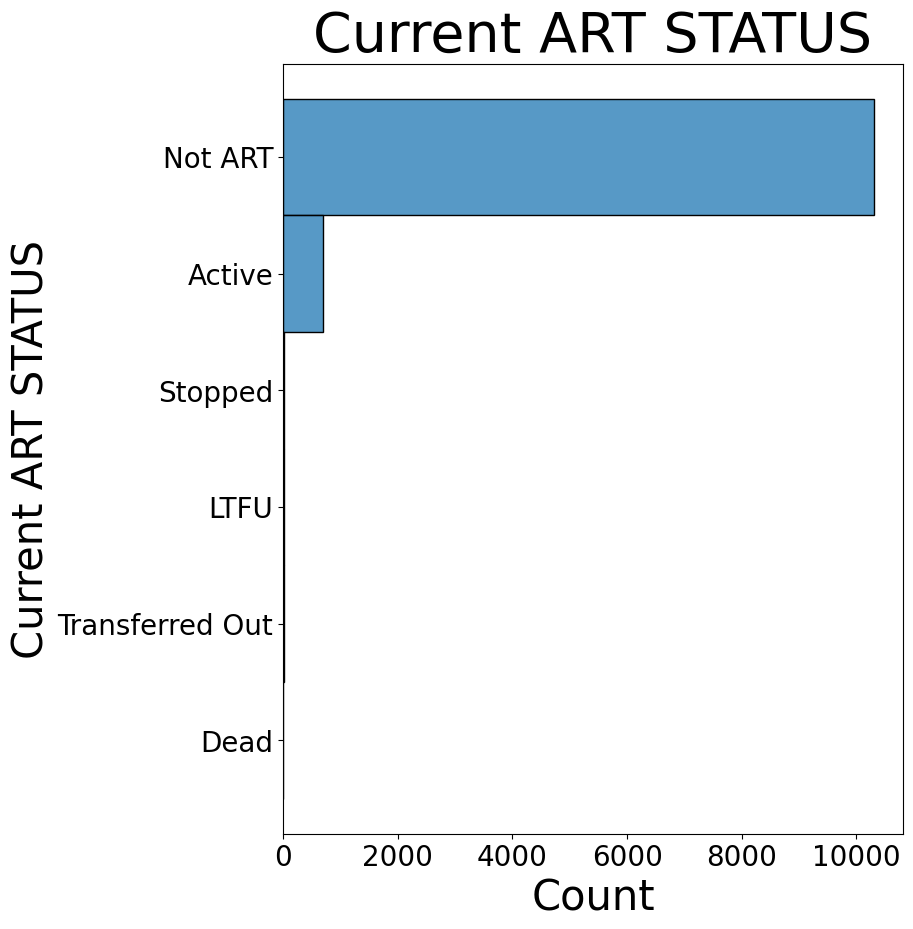

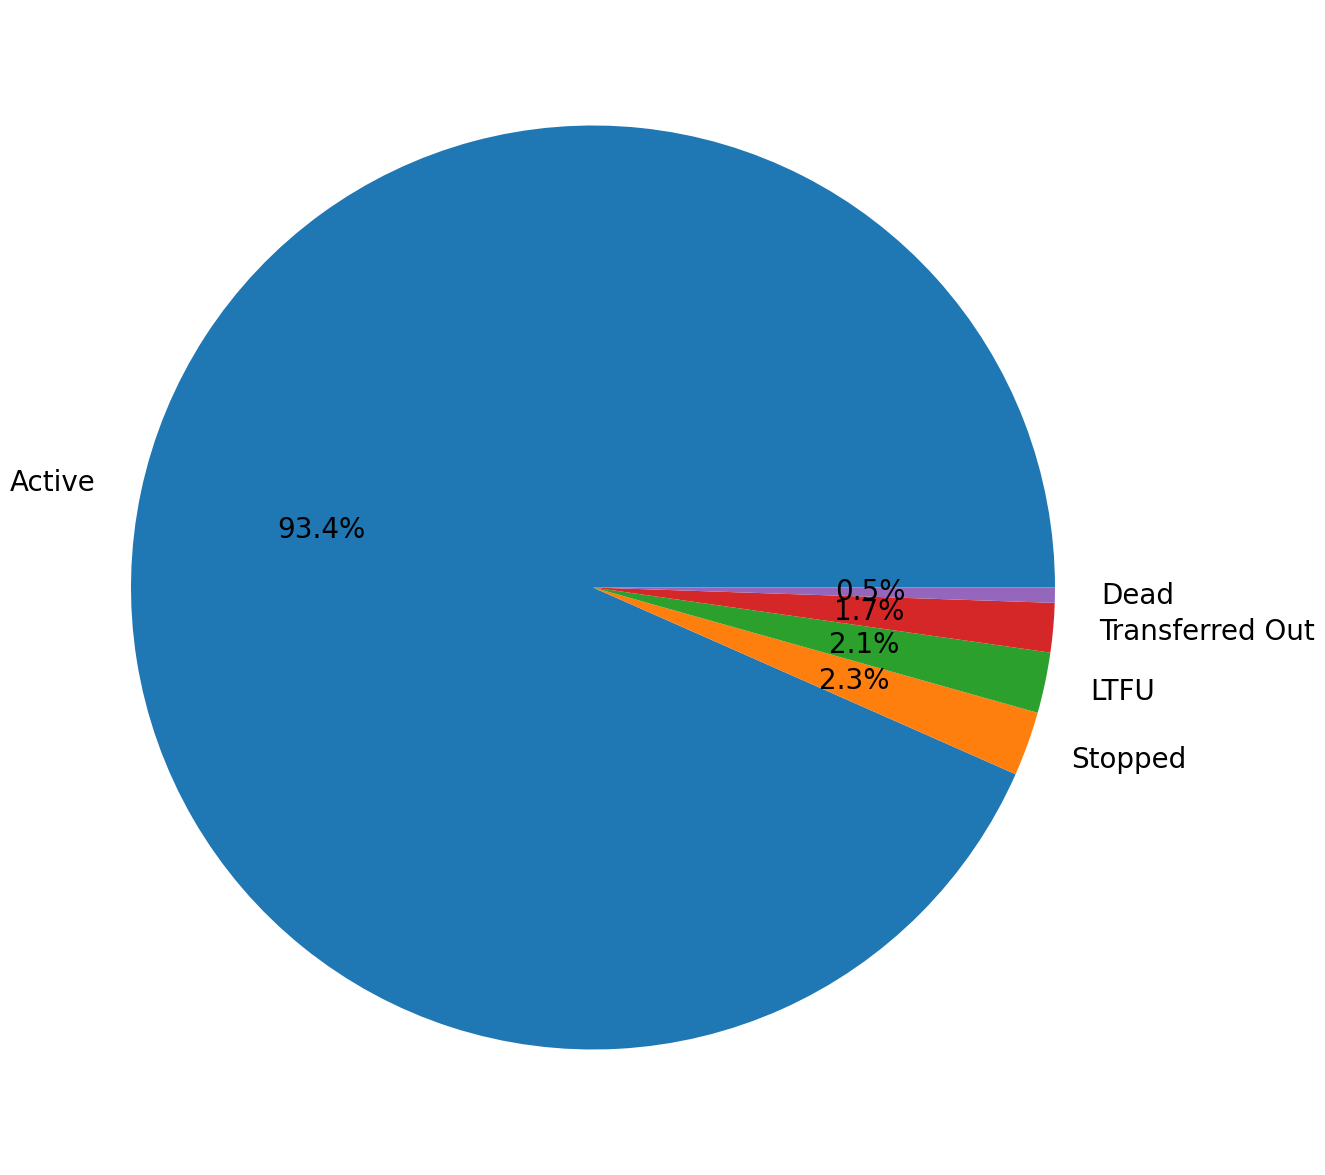

In [18]:
plt.figure(figsize=(8,10))
sns.histplot(data= child_reg, y='Current ART STATUS')
plt.xlabel('Count',fontsize=30)
plt.ylabel('Current ART STATUS',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Current ART STATUS", fontsize=40)
plt.savefig(current_directory + '/Current_ART_STATUS')

plt.figure(figsize=(15,15))
CLHIV = child_reg.drop(child_reg[child_reg['Current ART STATUS'].isin(['Not ART'])].index)

plt.pie(CLHIV['Current ART STATUS'].value_counts(),labels=['Active','Stopped', 'LTFU','Transferred Out','Dead'],autopct='%1.1f%%', textprops={'fontsize': 20})
plt.show()

## Bivarate Analysis

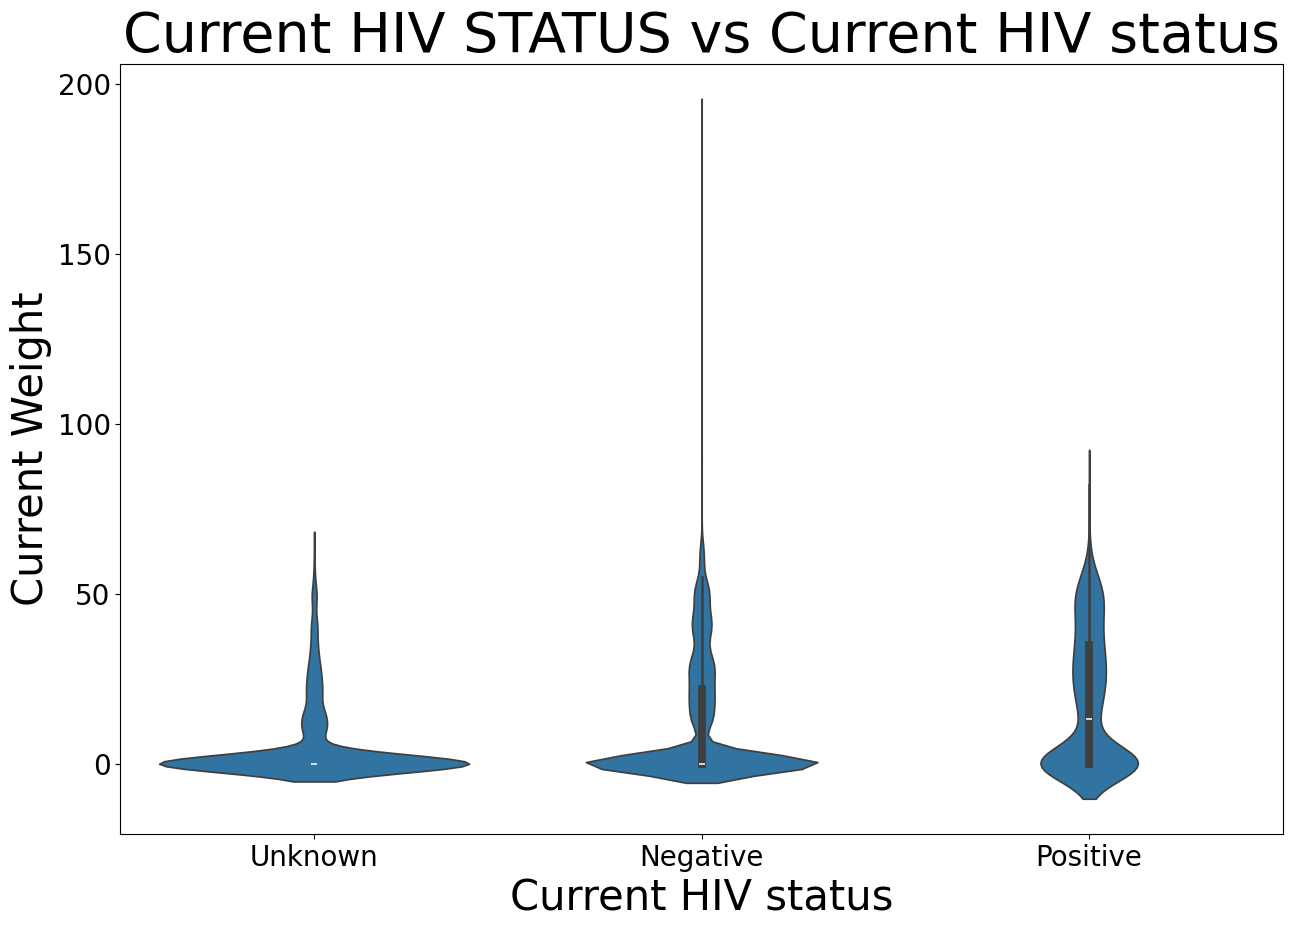

In [19]:
plt.figure(figsize=(15,10))
sns.violinplot(data= child_reg, y ='Current Weight',x= 'Current HIV status')
plt.xlabel('Current HIV status',fontsize=30)
plt.ylabel('Current Weight',fontsize=30)
plt.xticks(fontsize=20)
#plt.ylim(0,100)
plt.yticks(fontsize=20)
plt.title("Current HIV STATUS vs Current HIV status", fontsize=40)
plt.show()


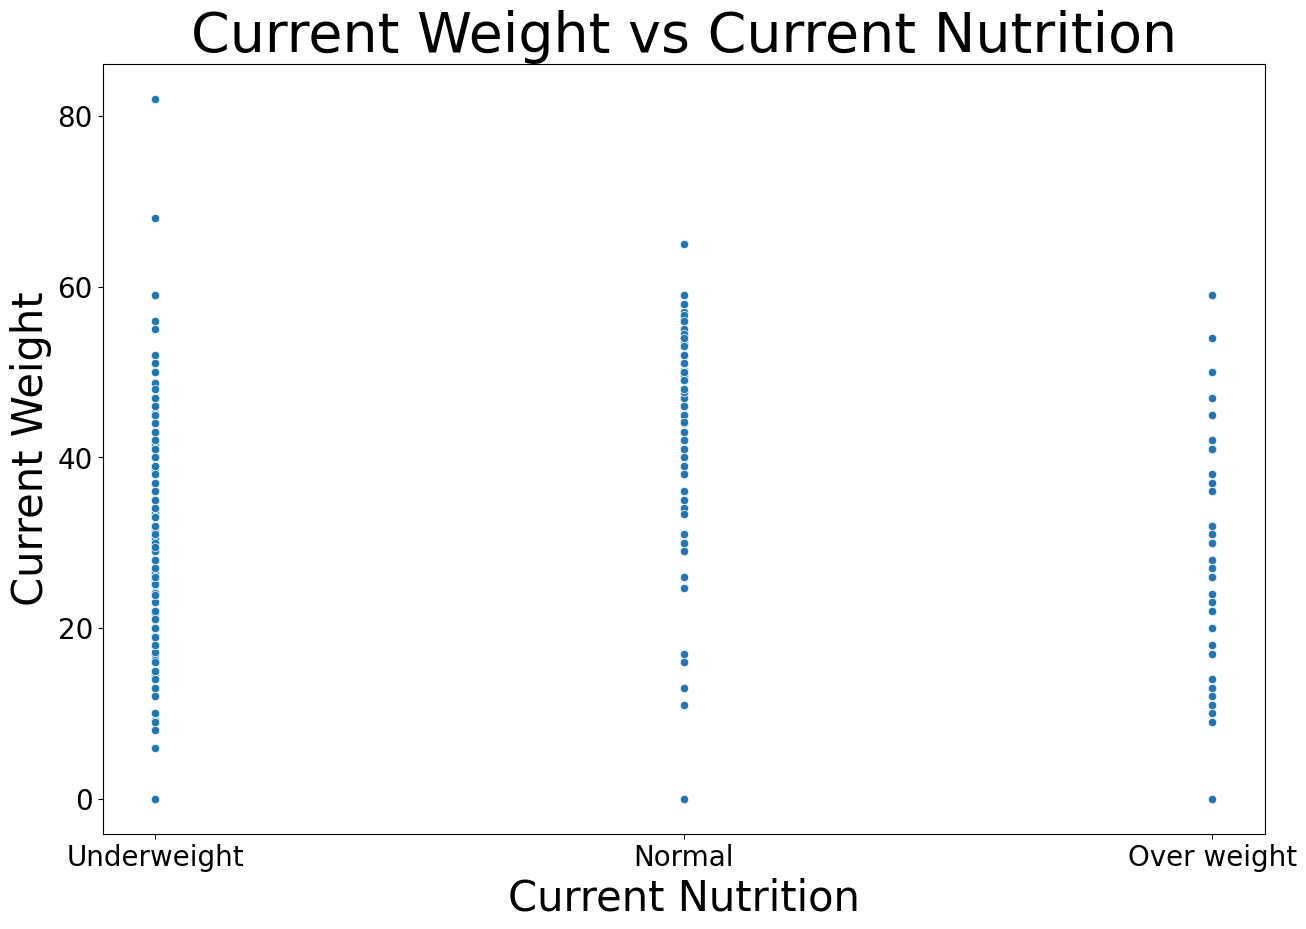

In [20]:
plt.figure(figsize=(15,10))
sns.scatterplot(data= CLHIV,y='Current Weight', x='Current Nutrition')
plt.xlabel('Current Nutrition',fontsize=30)
plt.ylabel('Current Weight',fontsize=30)
plt.xticks(fontsize=20)
#plt.ylim(0,100)
plt.yticks(fontsize=20)
plt.title("Current Weight vs Current Nutrition", fontsize=40)
plt.show()


<Figure size 3000x2000 with 0 Axes>

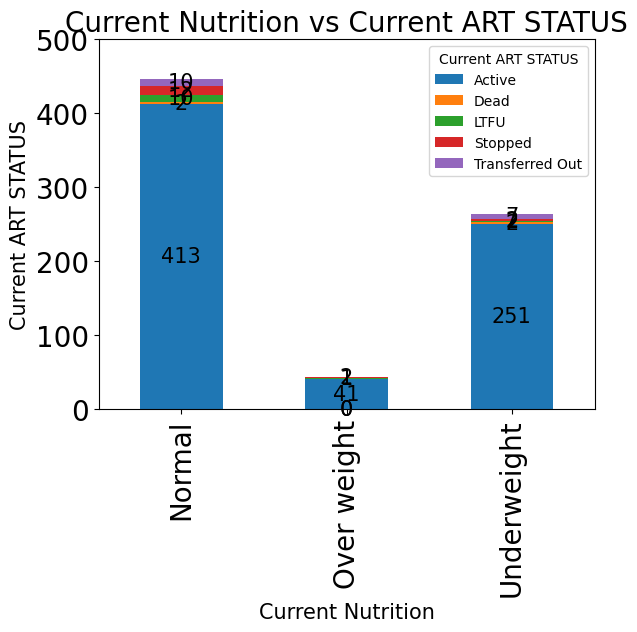

In [21]:
plt.figure(figsize=(30,20))
crossTab = pd.crosstab(CLHIV['Current Nutrition'], CLHIV['Current ART STATUS'], values='OVC Id',aggfunc='count')
ax = crossTab.plot(kind ='bar', stacked =True)
plt.xlabel('Current Nutrition',fontsize=15)
plt.ylabel('Current ART STATUS',fontsize=15)
plt.xticks(fontsize=20)
plt.ylim(0,500)
plt.yticks(fontsize=20)
plt.title("Current Nutrition vs Current ART STATUS", fontsize=20)


# Add value labels to the bars
for container in ax.containers:
    # Loop through the patches of each stack and add the labels
    for patch in container.patches:
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_y() + patch.get_height() /2
        label = f'{int(patch.get_height()):,}'
        ax.text(x, y, label, ha='center', va='center', color='black', fontsize=15)
        

plt.show()

<Figure size 3000x3000 with 0 Axes>

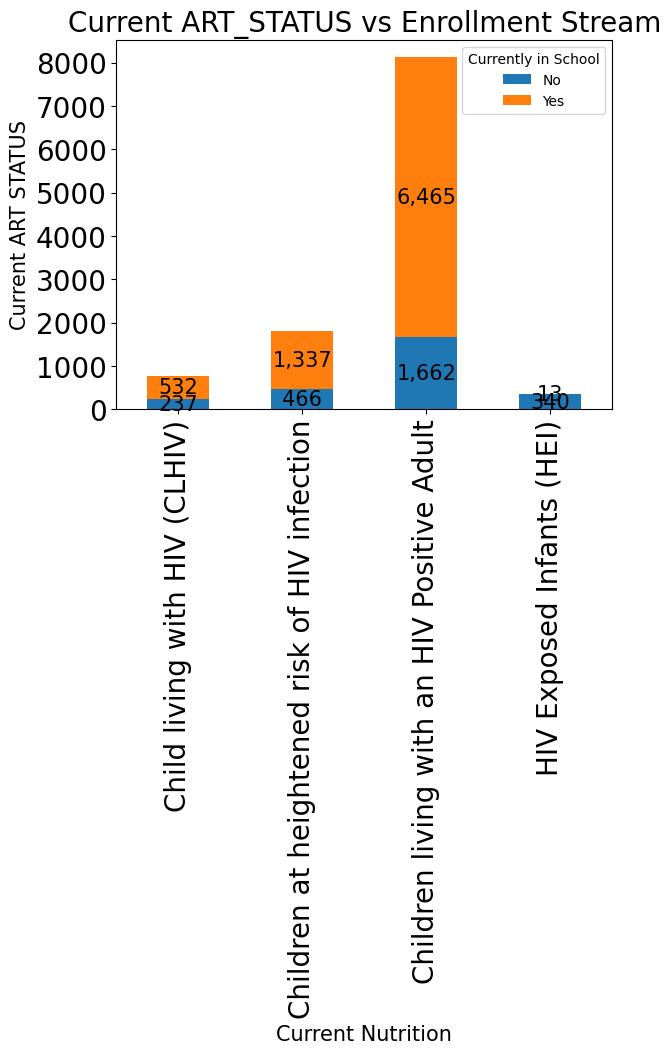

In [22]:
plt.figure(figsize=(30,30))
crossTab = pd.crosstab(child_reg['Main enrollment stream'], child_reg['Currently in School'], values='OVC Id',aggfunc='count')
ax = crossTab.plot(kind ='bar', stacked =True)
plt.xlabel('Current Nutrition',fontsize=15)
plt.ylabel('Current ART STATUS',fontsize=15)
plt.xticks(fontsize=20)

plt.yticks(fontsize=20)
plt.title("Current ART_STATUS vs Enrollment Stream", fontsize=20)


# Add value labels to the bars
for container in ax.containers:
    # Loop through the patches of each stack and add the labels
    for patch in container.patches:
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_y() + patch.get_height() /2
        label = f'{int(patch.get_height()):,}'
        ax.text(x, y, label, ha='center', va='center', color='black', fontsize=15)
        
plt.show()

### Multivarate Analysis

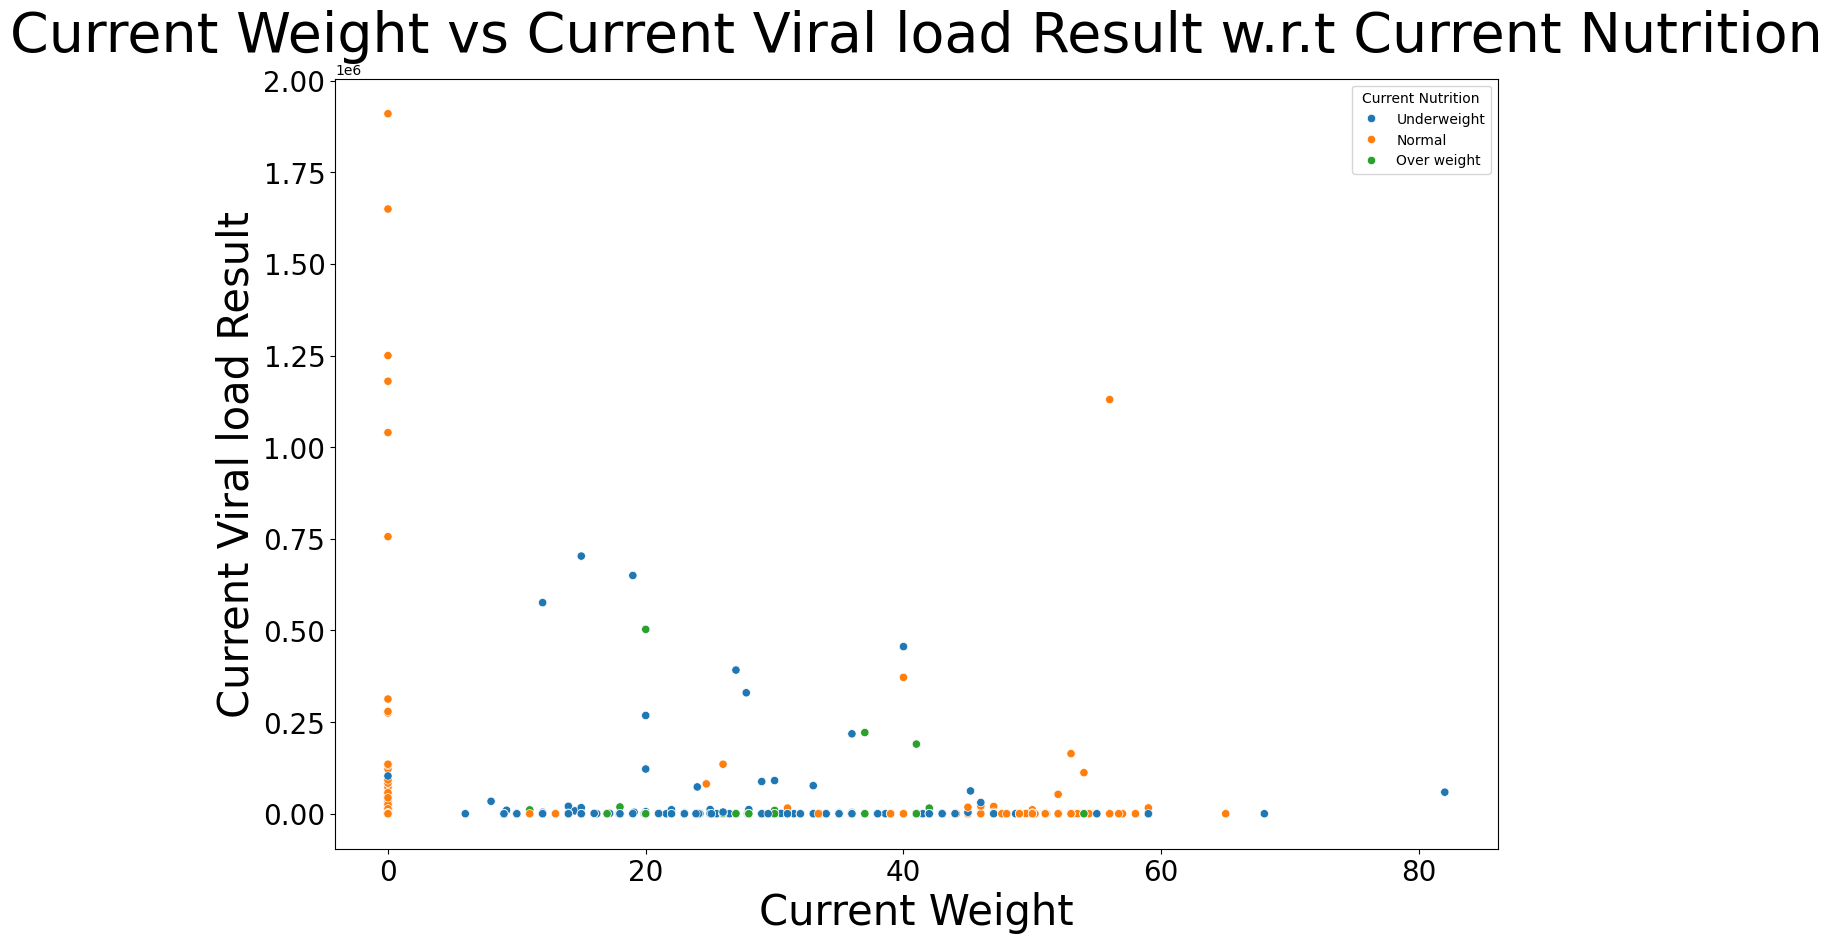

In [23]:
plt.figure(figsize=(15,10))
sns.scatterplot(data= CLHIV, x='Current Weight',y='Current Viral load Result', hue='Current Nutrition')
plt.xlabel('Current Weight',fontsize=30)
plt.ylabel('Current Viral load Result',fontsize=30)
plt.xticks(fontsize=20)
#plt.ylim(0,100)
plt.yticks(fontsize=20)
plt.title("Current Weight vs Current Viral load Result w.r.t Current Nutrition", fontsize=40)
plt.show()



## Split to Input and Target Variable

In [24]:
target_feature = child_reg.CLASS
independent_feature = child_reg.drop(['CLASS','Treatment ID'], axis=1)
#objectVariable = independent_feature.select_dtypes(include=['object'])
#chilgreg_numVariable = independent_feature.select_dtypes(include=['int64', 'float64'])
#floatVariable = child_reg.select_dtypes(include=['object'])

In [25]:
independent_feature['day_enrolled'] = independent_feature['Date of enrollment (yyyy-mm-dd)'].str[:2].astype(int)
independent_feature['month_enrolled'] = independent_feature['Date of enrollment (yyyy-mm-dd)'].str[3:5].astype(int)
independent_feature['year_enrolled'] = independent_feature['Date of enrollment (yyyy-mm-dd)'].str[6:].astype(int)

independent_feature['day_HIV_STATUS'] = independent_feature['Date of Current HIV status'].str[:2].astype(int)
independent_feature['month_HIV_STATUS'] = independent_feature['Date of Current HIV status'].str[3:5].astype(int)
independent_feature['year_HIV_STATUS'] = independent_feature['Date of Current HIV status'].str[6:].astype(int)

independent_feature['day_TX_STATUS'] = independent_feature['Date of current status'].str[:2].astype(int)
independent_feature['month_TX_STATUS'] = independent_feature['Date of current status'].str[3:5].astype(int)
independent_feature['year_TX_STATUS'] = independent_feature['Date of current status'].str[6:].astype(int)

#independent_feature = child_reg.drop(['Date of enrollment (yyyy-mm-dd)','Date of Current HIV status','Date of current status'], axis=1)
OVC_df= independent_feature.copy()
OVC_df = OVC_df.drop(['Date of enrollment (yyyy-mm-dd)','Date of Current HIV status','Date of current status'], axis=1)
OVC_df.head()

,LGA,CBO,Enrollment setting,Current age,Sex(M/F),Current enrollment status,Main enrollment stream,Baseline Safety,Current Safety,Baseline HIV status,...,Date case plan developed,day_enrolled,month_enrolled,year_enrolled,day_HIV_STATUS,month_HIV_STATUS,year_HIV_STATUS,day_TX_STATUS,month_TX_STATUS,year_TX_STATUS
0,Langtang North,AIDS CARE EDUCATION AND TRAINING SOCIETY,Community,10 Year,M,active,Children living with an HIV Positive Adult,No Safety,Birth registration awareness,Unknown,...,Mon Jan 01 00:00:00 WAT 1900,30,3,2022,1,1,1900,4,10,2022
1,Shendam,AIDS CARE EDUCATION AND TRAINING SOCIETY,Community,6 Year,M,active,Children living with an HIV Positive Adult,No Safety,No Safety,Negative,...,Mon Jan 01 00:00:00 WAT 1900,12,12,2022,12,12,2022,6,1,2023
2,Mangu,CENTER FOR CHILDREN IN CRISES,Community,18 Year,M,active,Children living with an HIV Positive Adult,No Safety,Parenting skills,Negative,...,Mon Jan 01 00:00:00 WAT 1900,28,3,2022,28,3,2022,15,2,2023
3,Jos South,HEAL THE YOUTH FOUNDATION,Community,17 Year,M,active,Children living with an HIV Positive Adult,No Safety,Birth registration awareness,Negative,...,Mon Jan 01 00:00:00 WAT 1900,24,5,2022,24,5,2022,6,1,2023
4,Mangu,CENTER FOR CHILDREN IN CRISES,Facility,17 Year,M,active,Child living with HIV (CLHIV),No Safety,Parenting skills,Positive,...,Mon Jan 01 00:00:00 WAT 1900,9,1,2022,7,7,2009,6,2,2023


In [26]:
OVC_df.nunique()

LGA                                          13
CBO                                           4
Enrollment setting                            2
Current age                                  26
Sex(M/F)                                      2
Current enrollment status                     3
Main enrollment stream                        4
Baseline Safety                               5
Current Safety                               13
Baseline HIV status                           3
Current HIV status                            3
Child has birth certificate at baseline?      2
Child has birth certificate currently         2
Baseline in school                            2
Currently in School                           2
Nutrition                                     3
Current Nutrition                             3
Baseline Weight                               1
Baseline Height                               1
Current Weight                              224
Current Height                          

In [27]:
OVC_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11052 entries, 0 to 11295
Data columns (total 40 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   LGA                                       11052 non-null  object 
 1   CBO                                       11052 non-null  object 
 2   Enrollment setting                        11052 non-null  object 
 3   Current age                               11052 non-null  object 
 4   Sex(M/F)                                  11052 non-null  object 
 5   Current enrollment status                 11052 non-null  object 
 6   Main enrollment stream                    11052 non-null  object 
 7   Baseline Safety                           11044 non-null  object 
 8   Current Safety                            11052 non-null  object 
 9   Baseline HIV status                       11052 non-null  object 
 10  Current HIV status                     

## Check for outliers-child reg

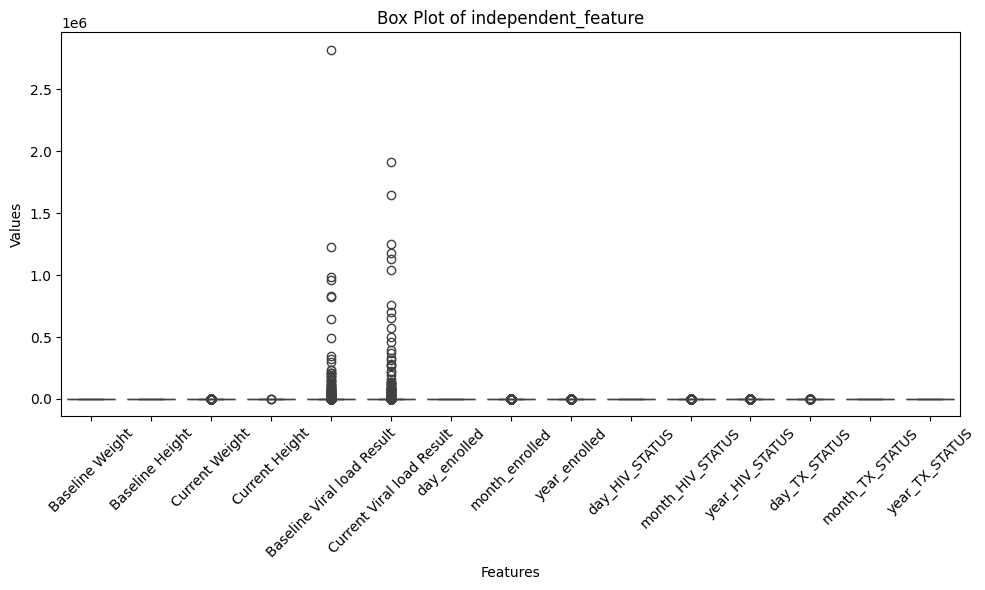

In [28]:
# Visualize treated data
plt.figure(figsize=(10, 6))
sns.boxplot(data=OVC_df)
plt.xlabel("Features", size=10)
plt.ylabel("Values", size=10)  # Optionally, add a y-axis label
plt.title("Box Plot of independent_feature")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

## Data Encoding

### child Reg

In [29]:
encode_OVC_df = pd.get_dummies(OVC_df).astype(int)
encode_OVC_df.head()

,Baseline Weight,Baseline Height,Current Weight,Current Height,Baseline Viral load Result,Current Viral load Result,day_enrolled,month_enrolled,year_enrolled,day_HIV_STATUS,...,relationship to child_Aunt/Uncle,relationship to child_Caregiver,relationship to child_Father,relationship to child_Grandparents,relationship to child_Guardian,relationship to child_Mother,relationship to child_Other,relationship to child_Sister/Brother,Child has case plan?_No,Date case plan developed_Mon Jan 01 00:00:00 WAT 1900
0,0,0,0,0,0,0,30,3,2022,1,...,0,0,0,1,0,0,0,0,1,1
1,0,0,26,100,0,0,12,12,2022,12,...,0,0,0,0,0,1,0,0,1,1
2,0,0,63,175,0,0,28,3,2022,28,...,0,0,0,0,0,1,0,0,1,1
3,0,0,0,0,0,0,24,5,2022,24,...,0,0,0,0,0,1,0,0,1,1
4,0,0,51,170,10,39,9,1,2022,7,...,0,0,0,0,0,1,0,0,1,1


## Treating Ouliers

### child reg

In [31]:
# Replace outliers with values at the specified percentiles
df_winsorized = encode_OVC_df.copy()
winsor_percentile = 0.05  # Adjust as needed
for column in df_winsorized.columns:
    lower_bound = df_winsorized[column].quantile(winsor_percentile)
    upper_bound = df_winsorized[column].quantile(1 - winsor_percentile)
    df_winsorized[column] = df_winsorized[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

## Dimensionality Reduction

### Feature Selection

#### Recursive Feature Elimination-child reg

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest,chi2, RFE
array=df_winsorized.values
X = array
Y = target_feature.values

model = LinearDiscriminantAnalysis()
#Get columns for table
cols= df_winsorized.columns

rfe=RFE(model,n_features_to_select=18)

# Fit RFE to the data, where X is your feature matrix and Y is your target variable
fit = rfe.fit(X, Y)

# Create a DataFrame to store the feature ranking obtained from RFE
rfeDF = pd.DataFrame({'Feature': cols, 'Rank': fit.ranking_})

# Sort the DataFrame based on the ranking in descending order
rfeDf = rfeDF.sort_values(by='Rank', ascending=True)

# Filter DataFrame to features with rank 1
selected_features = rfeDF[rfeDF['Rank'] == 1]['Feature']

# Print the selected features
#print(selected_features)

In [33]:
Features = fit.transform(X)
rfeSelectedDF =pd.DataFrame(Features, columns=selected_features)

## Class Balancing

In [34]:
X_train, X_test, Y_train, Y_test= train_test_split(rfeSelectedDF, target_feature ,test_size=0.3,random_state=42)

In [35]:
# Initialize SMOTE with default sampling strategy ('auto'), which adjusts the sampling of minority class to be equal to majority class
smote = SMOTE(random_state=42)

# Resample the features and target using SMOTE
resampled_features, resampled_target = smote.fit_resample(X_train, Y_train)

# Check the count of each class in the resampled target variable
resampled_target.value_counts()

/Users/Blessing/anaconda3/lib/python3.10/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


CLASS
1    5515
0    5515
Name: count, dtype: int64

## Feature Scaling

### OVC-Train dataset

In [36]:
X_arr = resampled_features.values
Y = resampled_target.values
demo = MinMaxScaler(feature_range=(0,1))
rescaledX = demo.fit_transform(X=X_arr)

### OVC-Test dataset

In [37]:
X_tesr_arr =X_test.values
rescaled_test = demo.fit_transform(X=X_tesr_arr)

# Model Building

In [38]:
models = []
#models.append(('LD', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))
models.append(('LR', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('GBC',GradientBoostingClassifier()))


# Model Evaluation Metrics

In [39]:
Results = []
cm = []
names = []
AUCs = []


for name, model in models:
    model.fit(rescaledX, resampled_target)
    predicted_Y = model.predict(rescaled_test)
    accuracy = accuracy_score(Y_test, predicted_Y)
    aucs = roc_auc_score(Y_test, predicted_Y)
    AUCs.append(auc)
    report = classification_report(Y_test, predicted_Y, digits=4)
    #precision, recall, f1_score = report.split('\n')[-2].split()[:3]
    precision = precision_score(Y_test, predicted_Y)
    recall = recall_score(Y_test, predicted_Y)
    f1_score_value = f1_score(Y_test, predicted_Y)
    cm_ = confusion_matrix(Y_test, predicted_Y)
    cm.append(cm_)
    Results.append({'Algorithm':name,'accuracy':accuracy,'precision':precision,'recall':recall, 'F1-score':f1_score_value, 'AUC': aucs})
resultDF = pd.DataFrame(Results)
resultDF # show results dataframe



,Algorithm,accuracy,precision,recall,F1-score,AUC
0,GNB,0.856755,0.785012,0.680511,0.729036,0.803444
1,LR,0.894150,0.783784,0.864750,0.822278,0.885257
2,DTC,0.897165,0.794291,0.859425,0.825575,0.885749
3,RF,0.898673,0.796460,0.862620,0.828221,0.887768
4,GBC,0.896562,0.789883,0.864750,0.825623,0.886939


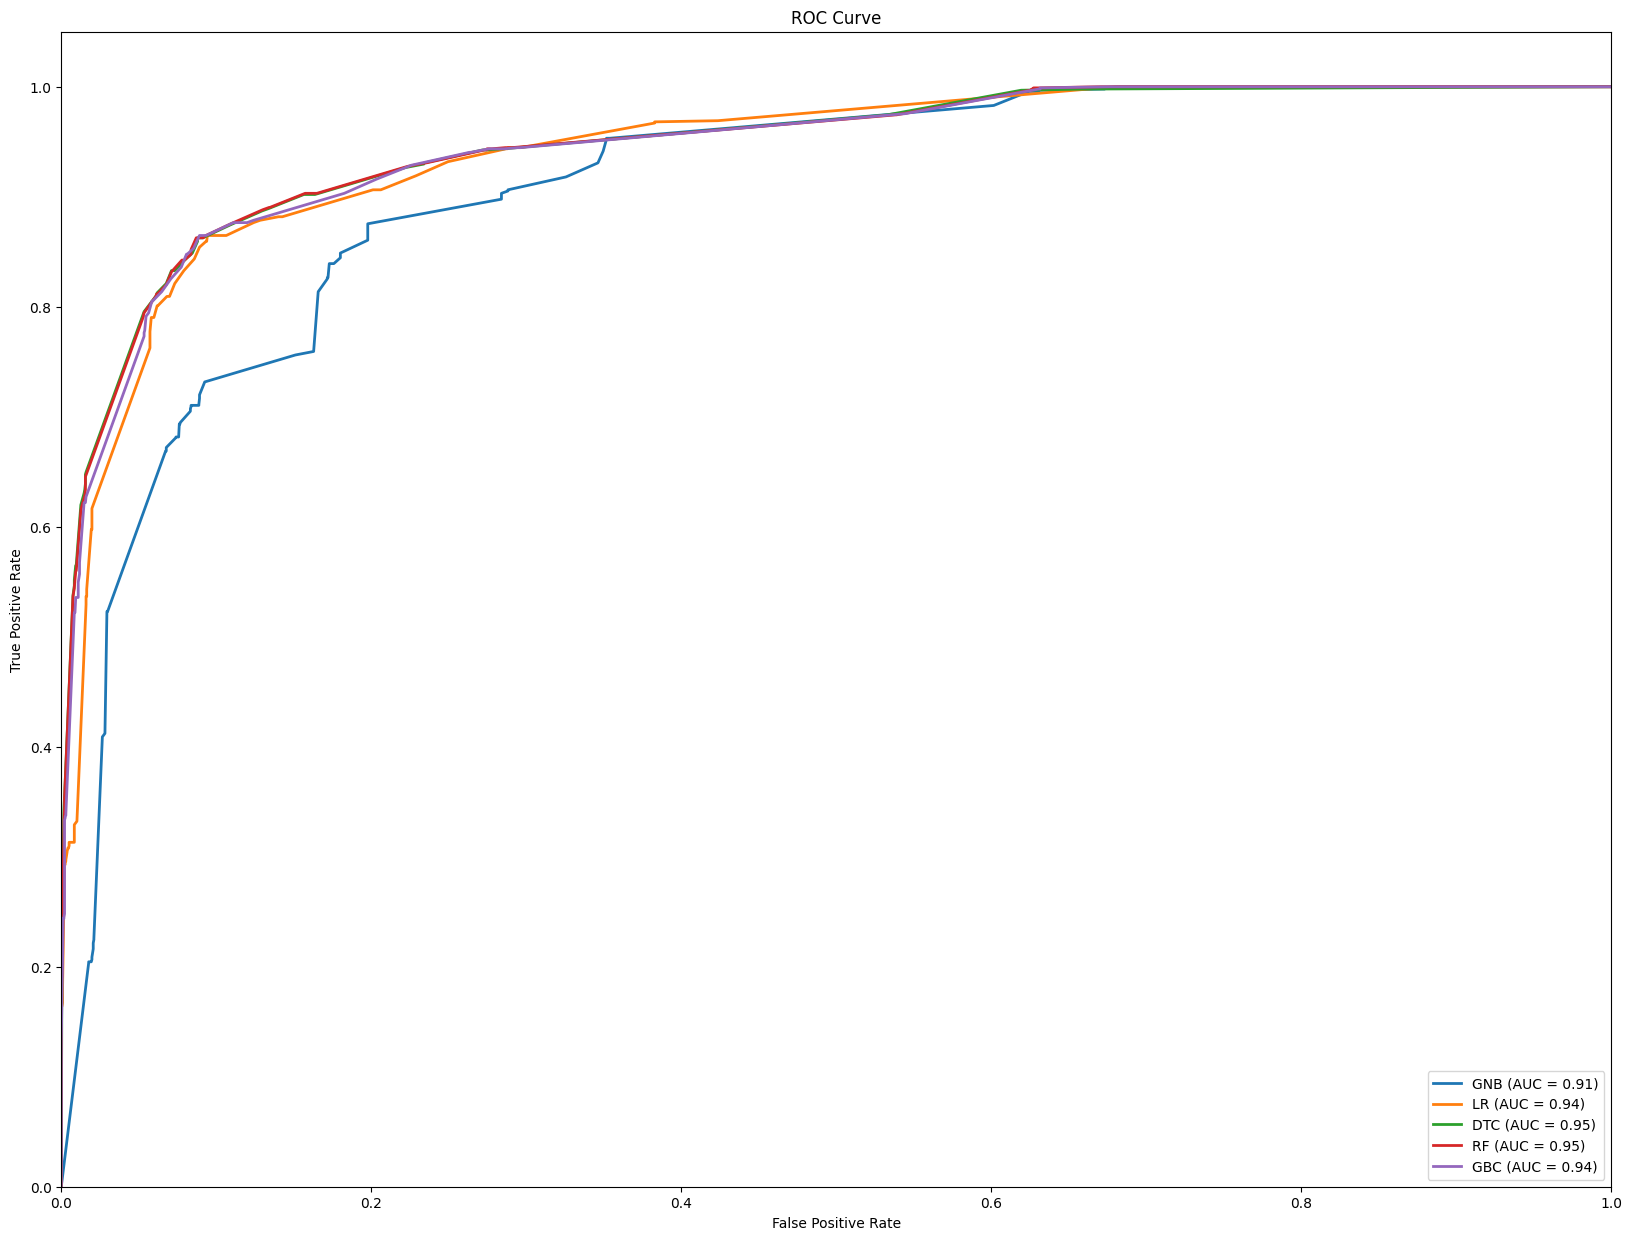

In [40]:
fig, ax = plt.subplots(figsize=(20, 15))
for name, model in models:
    fpr, tpr, _ = roc_curve(Y_test, model.predict_proba(rescaled_test)[:, 1])
    roc_auc = auc(fpr, tpr)  # Use auc from sklearn.metrics
    plt.plot(fpr, tpr, lw=2, label=name + ' (AUC = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## FEATURE IMPORTANCE

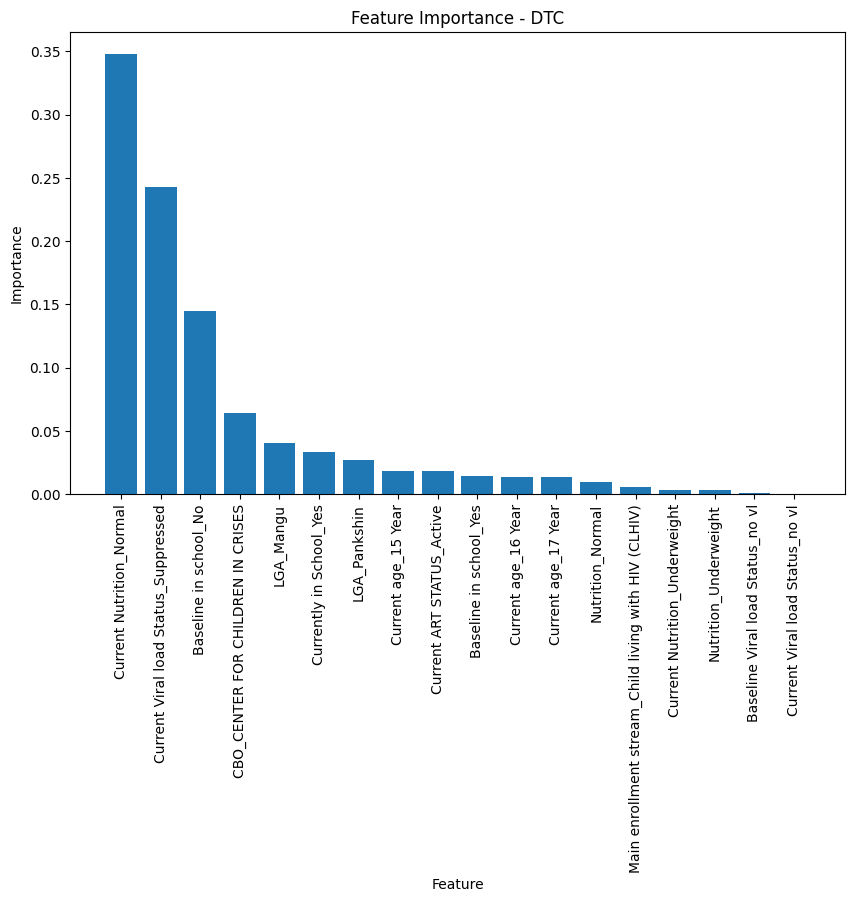

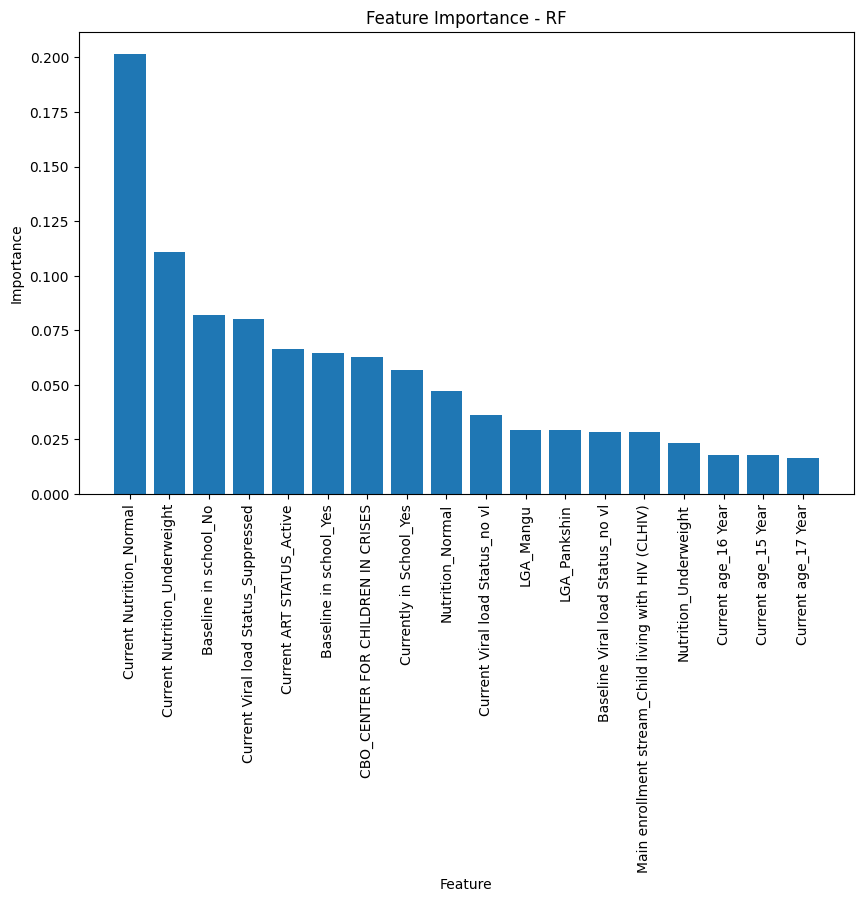

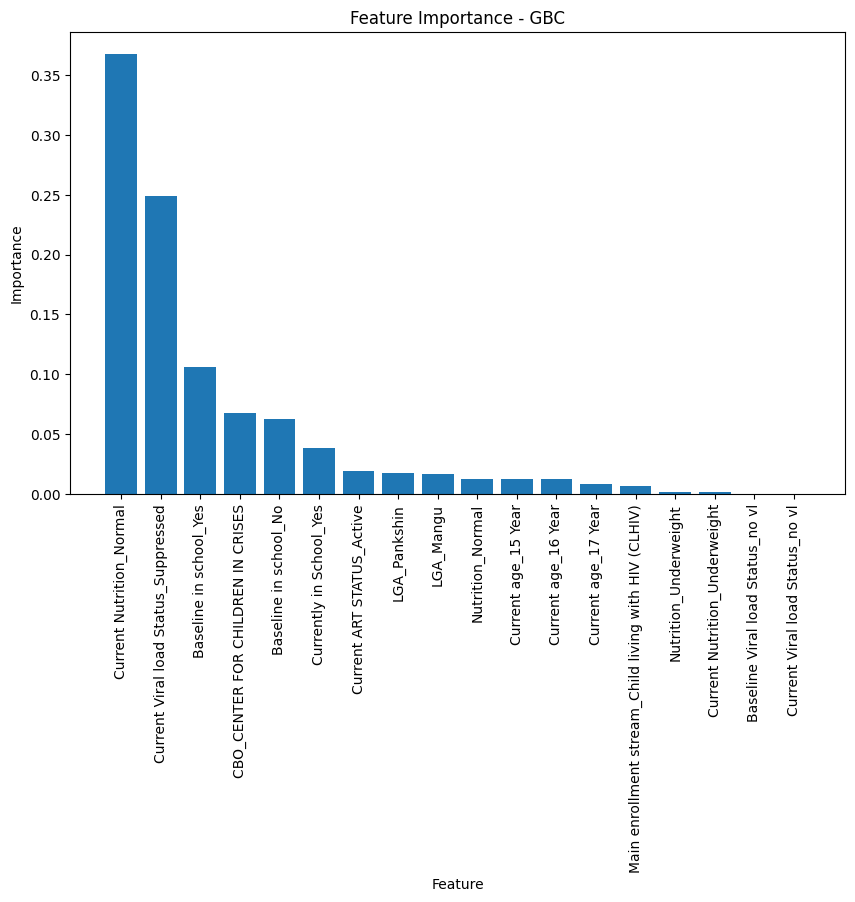

In [41]:
for name, model in models:
    if hasattr(model, 'feature_importances_'):  # Check if the model has the attribute 'feature_importances_'
        feature_importance = model.feature_importances_
        # Sort feature importance
        sorted_indices = np.argsort(feature_importance)[::-1]
        sorted_features = [X_train.columns[i] for i in sorted_indices]
        sorted_importance = feature_importance[sorted_indices]
        

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(sorted_features)), sorted_importance, align='center')
        plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.title(f'Feature Importance - {name}')
        plt.show()

## Confusion Matrix

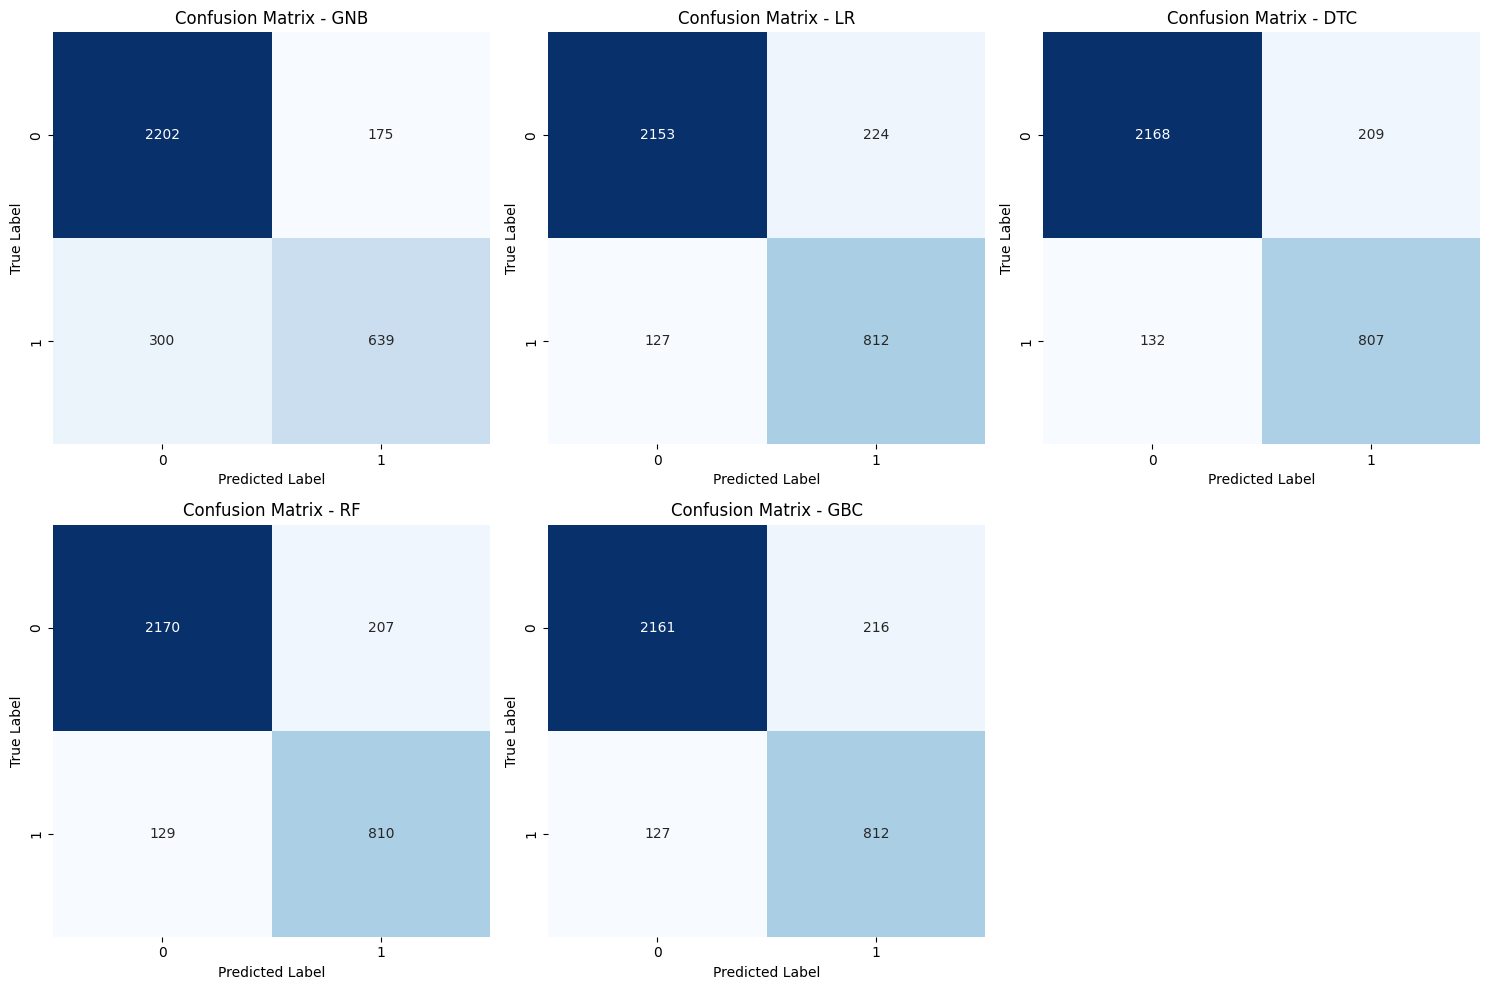

In [42]:
plt.figure(figsize=(15, 10))
for i, (name, _) in enumerate(models):
    plt.subplot(2, 3, i + 1)
    sns.heatmap(cm[i], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [43]:
model_param_grid = {
  'logistic_regression':{
    'model': LogisticRegression(),
    'params':{
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': [ 'lbfgs', 'sag', 'saga'],
    'multi_class': ['ovr', 'multinomial'],
    'max_iter': [1000,1500] }
  },
    'GaussianNB':{
    'model': GaussianNB(),
    'params':{
    'var_smoothing': np.logspace(0,-9, num=100)}
    },
    'Decision_Tree_Classifier':{
    'model': DecisionTreeClassifier(),
    'params': {
            "criterion": ["gini", "entropy"],
            "max_depth": [None, 5, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "max_features": ["auto", "sqrt", "log2", None]}
    },
    'Random_Forest_Classifier': {
    'model': RandomForestClassifier(),
    'params':{
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],        # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],      # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'] }  # Number of features to consider when looking for the best split
    },
    'Gradient_Boosting_Classifier':{
    'model': GradientBoostingClassifier(),
    'params':{
    'n_estimators': [150, 200],
    'learning_rate': [0.5, 1.0],
    'max_depth': [5, 10],
    'min_samples_split': [3, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'] }
    }
}

In [45]:
Tuned_Model_scores =[] # to store result of the model

for model_name , param in model_param_grid.items():
    #start_time = time.time()  # Start time
    hp_Alg = RandomizedSearchCV(
    estimator=param['model'], 
    param_distributions=param['params'], 
    cv=5,
    return_train_score=False)
    hp_Alg.fit(rescaledX, resampled_target)
    #end_time = time.time()  # End time
    Tuned_Model_scores.append(
        {
            'Algorithm': model_name,
            'best_score': hp_Alg.best_score_,
            'best_params': hp_Alg.best_params_,
            #'computation_time': end_time - start_time,  # Compute time difference
        })
    # Evaluate on the test set
    test_score = hp_Alg.score(rescaled_test, Y_test)
    Tuned_Model_scores[-1]['Test_Result'] = test_score
    

/Users/Blessing/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/Blessing/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Blessing/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/Blessing/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver = _ch

In [46]:
scores_df = pd.DataFrame(Tuned_Model_scores, columns=['Algorithm', 'best_score','best_params','Test_Result'])
scores_df

,Algorithm,best_score,best_params,Test_Result
0,logistic_regression,0.877697,"{'solver': 'lbfgs', 'penalty': 'l2', 'multi_cl...",0.895959
1,GaussianNB,0.799275,{'var_smoothing': 0.1873817422860384},0.860977
2,Decision_Tree_Classifier,0.881142,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.898372
3,Random_Forest_Classifier,0.881958,"{'n_estimators': 300, 'min_samples_split': 10,...",0.898673
4,Gradient_Boosting_Classifier,0.881958,"{'n_estimators': 200, 'min_samples_split': 3, ...",0.898372
